<a href="https://colab.research.google.com/github/jeffreygalle/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 NUMERICAL DIFFERENTIATION PROBLEM STATEMENT

Numerical grids are used to take a continuous function and break it into a series of points. To analyze the points we can approximate derivatives to understand the behavior of the function between the points.

Example: 'linspace' in Python is used to create an array of evenly spaced numbers over a specified interval.

In [2]:
import numpy as np
# Creates an array x that starts at 0, ends at 10, and includes 3 additional
# numbers (2.5, 5, and 7.5) that are evenly spaced.
x = np.linspace(0, 10, 5)
print(x)

[ 0.   2.5  5.   7.5 10. ]


# 20.2 USING FINITE DIFFERENCE TO APPROXIMATE DERIVATIVES


1. Forward difference method: Uses the point of interest (xj) and the next point (xj+1) to approximate the slope.
2. Backward difference method: Uses the point of interest (xj) and the previous point (xj-1) to approximate the slope.

3. Central difference method: Takes a point before (xj-1) and a point after (xj+1) the point of interest for a balanced approximation, averaging the forward and backward slope.



# 20.2.1 USING FINITE DIFFERENCE TO APPROXIMATE DERIVATIVES WITH TAYLOR SERIES



1. Forward Difference and Taylor Series: To approximate the derivative of f(x) at xj then the forward difference approximation is

f′(xj​)   ≈  f(xj+1​) - f(xj)/h

Has an error term of O(h), the error decreases linearly as h decreases.

2. Backward Difference and Taylor Series: To approximate the derivative use f(xj-1) at and f(xj) then the backward difference approximation is

f'(xj) = f(xj) - f(xj-1)/h

Similarly, has an error term of O(h), the error decreases linearly as h decreases.
3. Central Difference and Taylor Series: Uses both f(xj+1) and f(xj-1), the approximation for the central differnce is


f'(xj) = f(xj+1) - f(xj-1)/2h

The central method has an error term of O(h^2), the error decreases quadratically as h decreases.


EXAMPLE: The following code computes the numerical derivative of f (x) = cos(x) using the forward-difference formula for decreasing step size, h. It then plots the maximum error between the approximated derivative and the true derivative versus h as shown in the generated figure.





<ipython-input-4-1823f83b4bda>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


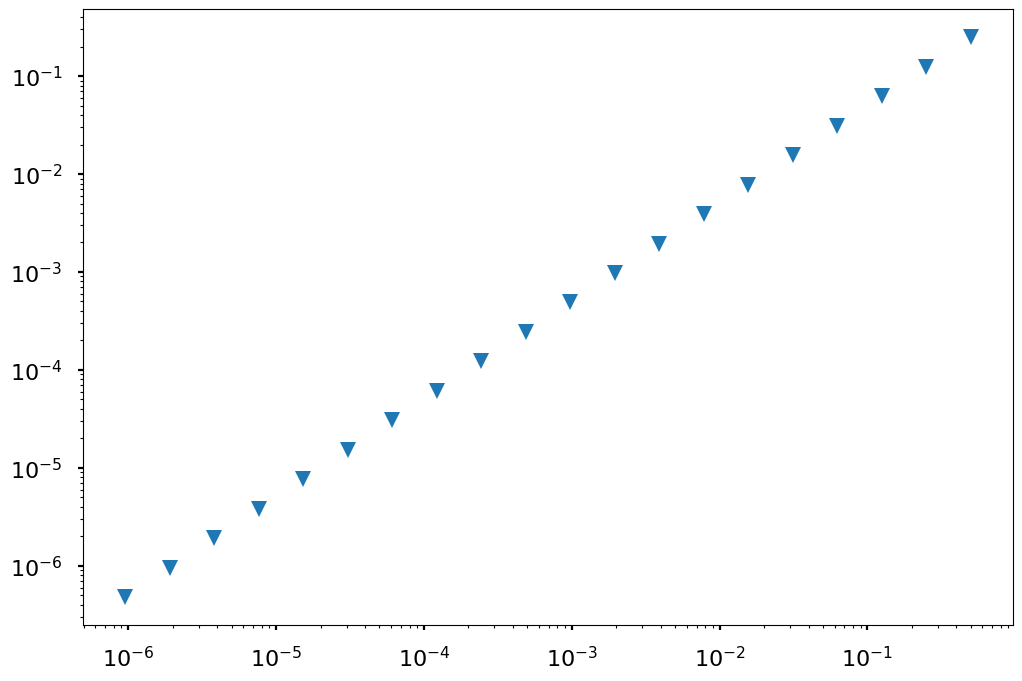

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline


# define step size
h=1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []
for i in range(iterations):
  # halve the step size
  h /= 2
  # store this step size
  step_size.append(h)
  # compute new grid
  x = np.arange(0, 2 * np.pi, h)
  # compute function value at grid
  y = np.cos(x)
  # compute vector of forward differences
  forward_diff = np.diff(y)/h
  # compute corresponding grid
  x_diff = x[:-1]
  # compute exact solution
  exact_solution = -np.sin(x_diff)
  # Compute max error between
  # numerical derivative and exact solution
  max_error.append(max(abs(exact_solution - forward_diff)))
# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, "v")
plt.show()

# 20.3 APPROXIMATING OF HIGHER ORDER DERIVATIVES

Taylor series can be used to approximate higher order derivatives. Given the Taylor series expansion is:

 \begin{align*}f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \ldots\end{align*}

Approximating the 2nd-Order Derivative:
For the forward point (xj+1):

\begin{align*}f(x_{j+1}) = f(x_j) + f'(x_j)h + \frac{f''(x_j)}{2}h^2 + \frac{f'''(\xi_1)}{3!}h^3
\end{align*}


For the backward point (xj+1):

\begin{align*}f(x_{j-1}) = f(x_j) - f'(x_j)h + \frac{f''(x_j)}{2}h^2 - \frac{f'''(\xi_2)}{3!}h^3\end{align*}

Add the two expansions and solve for f''(xj) yields the approximation:

\begin{align*}f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}\end{align*}

The error term is O(h^2), the approximation's accuracy improves quadratically as h decreases.






# 20.4 NUMERICAL DIFFERENTIATION WITH NOISE

In the example in the book, the friend's voice is represented by the function f(x) = cos(x) and the noisy chatter is represented by ϵsin(ωx), where ϵ is small, making the sine wave's amplitude small, ω represents the frequency of the sine wave, which is assumed to be large.

The noisy function is then represented by

\begin{align*}f_{\epsilon,\omega}(x) = \cos(x) + \epsilon \sin(\omega x)\end{align*}

<ipython-input-5-93be12955e19>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


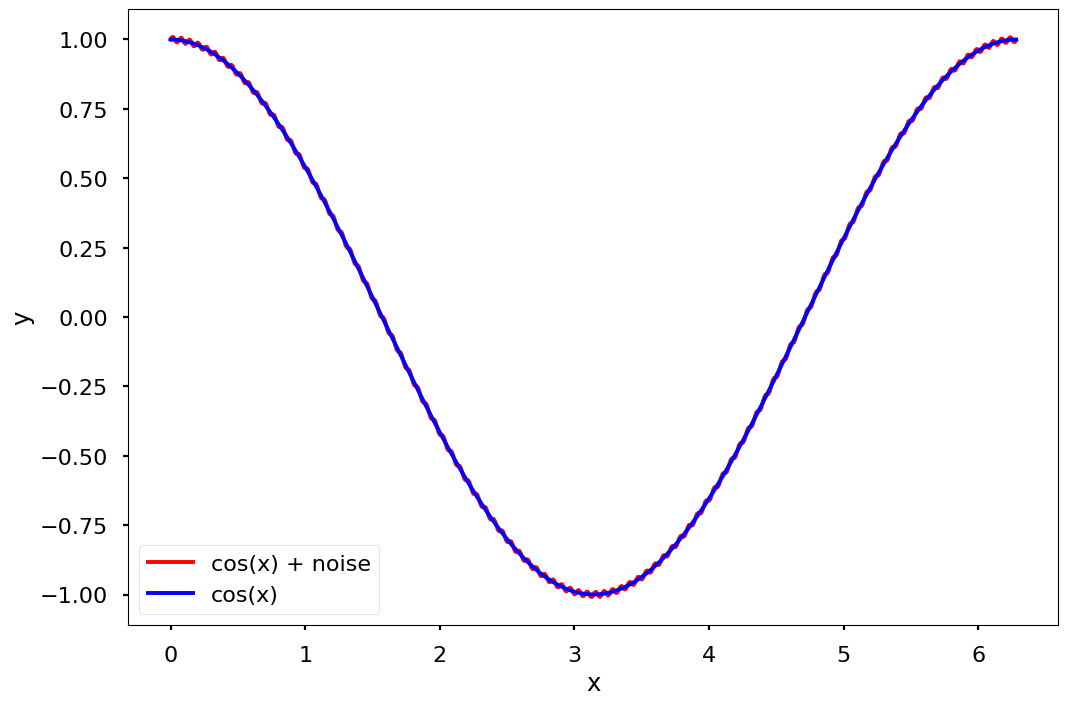

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline

x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, "r-", label = "cos(x) + noise")
plt.plot(x, y, "b-", label = "cos(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

# 20.5.2 Problem

Write a function my_der_calc(f, a, b, N, option) with the output as [df,X], where f is a function object, a and b are scalars such that a < b, N is an integer bigger than 10, and option is the string "forward", "backward", or "central". Let x be an array starting at a, ending at b, containing N evenly spaced elements, and let y be the array f(x). The output argument, df, should be the numerical derivatives computed for x and y according to the method defined by the input argument, option. The output argument X should be an array the same size as df, containing the points in x for which df is valid. Specifically, the forward difference method “loses” the last point, the backward difference method loses the first point, and the central difference method loses the first and last points.

In [21]:
import numpy as np

def my_der_calc(f, a, b, N, option):
    # Use linspace to create array of evenly spaces values
    x = np.linspace(a, b, N)
    # Compute the function values at these points
    y = f(x)
    # Initialize the array for derivatives
    if option != "central":
      size = N - 1
    else:
      size = N - 2
    df = np.zeros(size)

    # Initialize the X array
    X = np.zeros_like(df)

    # Calculate step size
    h = (b - a) / (N - 1)

    if option == "forward":
      df = (y[1:] - y[:-1]) / h
      X = x[:-1]

    elif option == "backward":
      df = (y[1:] - y[:-1]) / h
      X = x[1:]

    else:
      df = (y[2:] - y[:-2]) / (2*h)
      X = x[1:-1]

    return df, X

if __name__ == "__main__":
    def f(x):
        return np.cos(x)

    a, b, N = 0, np.pi, 100

    option = "central"

    df, X = my_der_calc(f, a, b, N, option)

    print("\nDerivatives:", df)
    print("\nX-values:", X)


Derivatives: [-0.03172261 -0.06341328 -0.09504009 -0.12657121 -0.15797488 -0.18921948
 -0.22027356 -0.25110584 -0.28168528 -0.31198108 -0.34196274 -0.37160008
 -0.40086325 -0.42972278 -0.45814962 -0.48611514 -0.51359118 -0.54055008
 -0.5669647  -0.59280842 -0.61805524 -0.64267973 -0.6666571  -0.6899632
 -0.71257456 -0.73446843 -0.75562274 -0.77601621 -0.79562829 -0.81443925
 -0.83243013 -0.84958282 -0.86588006 -0.88130543 -0.8958434  -0.90947934
 -0.9221995  -0.93399109 -0.94484222 -0.95474199 -0.9636804  -0.97164847
 -0.97863818 -0.98464248 -0.98965533 -0.99367167 -0.99668748 -0.9986997
 -0.99970632 -0.99970632 -0.9986997  -0.99668748 -0.99367167 -0.98965533
 -0.98464248 -0.97863818 -0.97164847 -0.9636804  -0.95474199 -0.94484222
 -0.93399109 -0.9221995  -0.90947934 -0.8958434  -0.88130543 -0.86588006
 -0.84958282 -0.83243013 -0.81443925 -0.79562829 -0.77601621 -0.75562274
 -0.73446843 -0.71257456 -0.6899632  -0.6666571  -0.64267973 -0.61805524
 -0.59280842 -0.5669647  -0.54055008 -0